# CAR PRICE PREDICTION USING MACHINE LEARNING

# Import Library

In [1]:
#Import Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Dataset
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
column=df.columns
column

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [7]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
#Stats about data
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Preprocessing the dataset 

In [10]:
# Check null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Label Encoding

In [12]:
#encode Fuel_type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#encode Selling_type column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
#encode Transmission column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
df1=df.head(20)
df1

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


# Exploratory Data Analysis

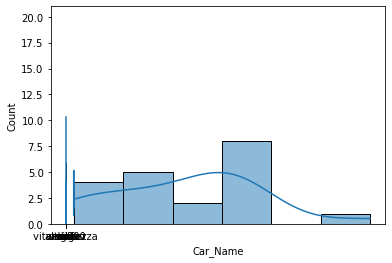

In [14]:
for column in df1.columns:
    sns.histplot(df1[column],kde=True)

<AxesSubplot:xlabel='Car_Name', ylabel='Count'>

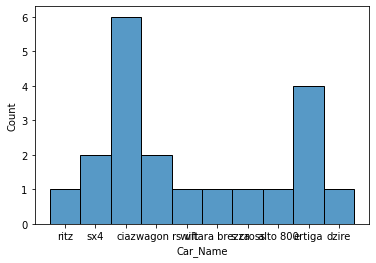

In [15]:
sns.histplot(df1['Car_Name'])

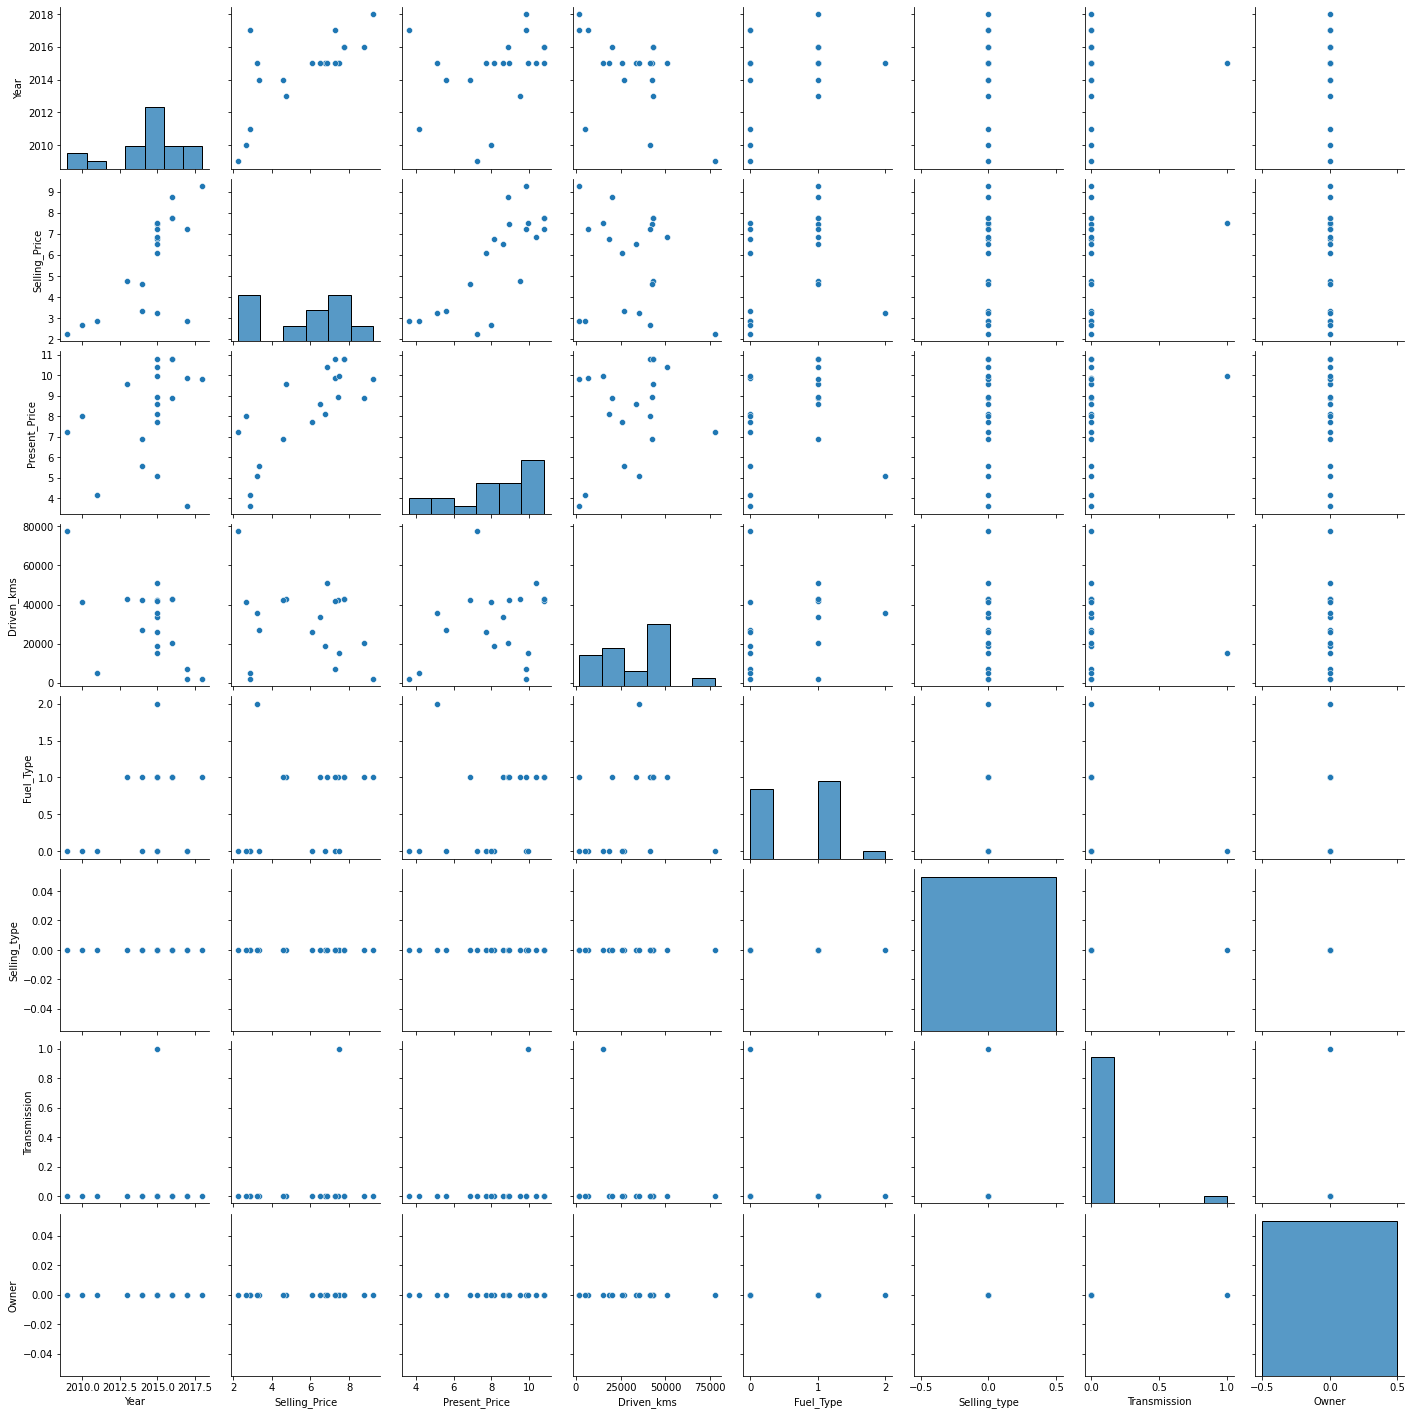

In [16]:
sns.pairplot(df1)

In [17]:
#Correlation Matrix
df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705
Selling_type,-0.039896,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000


<AxesSubplot:>

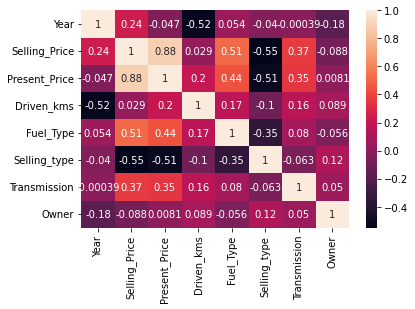

In [18]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [19]:
#Independent and Dependent Features
x=df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']
print(x)
print(y)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

# Model Training

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [27]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear= LinearRegression()

In [29]:
linear.fit(x_train,y_train)

LinearRegression()

In [36]:
#Prediction on training data
train_y_pred=linear.predict(x_train)
train_y_pred

array([ 6.78223922e+00,  1.02930253e+00,  4.32875578e+00,  2.37106608e-02,
        3.58559623e+00,  2.79474682e+00,  1.43627962e+00,  4.15322149e-01,
        1.61020571e+00,  1.12738674e+00,  4.32057015e+00,  6.17543662e+00,
        9.27219542e-01,  7.40544813e-01,  6.15466160e+00,  3.42571326e+00,
        2.32755056e+00,  7.49941752e+00,  4.61920772e+00,  4.43333519e+00,
        4.46322455e+00,  2.73371085e+00,  4.44317416e+00,  1.71157528e+00,
        2.49448164e-01,  3.94178550e+00,  1.37753849e+00,  4.61863581e+00,
        1.38480806e+00,  7.35889163e+00,  7.24362925e+00,  6.54453471e+00,
        2.28808903e+00,  2.19033057e+01,  2.20155438e+00,  5.64293779e+00,
        2.82948125e+00,  7.68488257e+00,  5.67000440e+00,  1.00259798e+01,
        1.99586011e+00,  2.37991569e+00,  1.22481756e+00,  2.40079490e+00,
        9.94261779e+00,  2.01857868e+00, -6.42686854e-01,  5.43100382e+00,
        1.14079609e+01, -3.13059065e-03,  1.09421419e+00,  1.61466187e+00,
        5.38596724e+00,  

In [37]:
#R squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_train,train_y_pred)
mae=mean_absolute_error(y_train,train_y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_train,train_y_pred)

In [32]:
print(mse)
print(mae)
print(rmse)
print(score)

2.936037747028905
1.2668186320545243
1.7134870139656457
0.8401415675614609


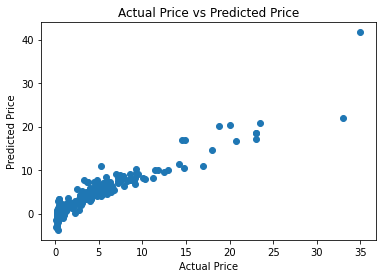

In [38]:
plt.scatter(y_train,train_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [39]:
#Prediction on test data
test_y_pred=linear.predict(x_test)
test_y_pred

array([10.39504752,  0.71253748,  4.26321182,  4.8978613 ,  9.8444441 ,
        4.22641014,  7.12195061,  7.37336045,  0.16006945,  5.16607316,
        6.20516135,  6.1749451 ,  2.11975888,  7.7388833 ,  1.92424059,
        1.71275545,  2.02658569,  1.85116583,  9.35048281,  4.25342246,
        1.49005291,  9.14466616,  1.45685415,  9.6324409 ,  0.82185873,
        8.07862002,  1.53585789, -3.19456462,  4.22247646,  2.09845315,
        3.42742898,  3.72347069,  5.57834996,  7.75729869, -1.91136002,
        6.81112662,  8.20645898,  5.80810908,  6.15499373,  6.27655972,
       16.01951157,  2.07233819,  1.04810664, -0.45611059,  6.82058172,
        6.78303989,  0.98586869,  6.83400287, 14.31641849,  3.01322766,
        8.04430564, -0.8912848 ,  8.99055987,  1.14726528,  2.11692771,
       -0.82809405,  0.68465873, 10.03034357, -0.4653801 , -2.42748337,
       10.08278075])

In [40]:
#R squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,test_y_pred)
mae=mean_absolute_error(y_test,test_y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,test_y_pred)

In [41]:
print(mse)
print(mae)
print(rmse)
print(score)

2.936037747028905
1.2668186320545243
1.7134870139656457
0.8401415675614609


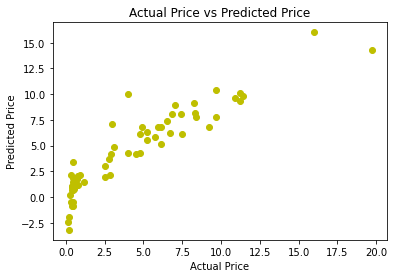

In [51]:
plt.scatter(y_test,test_y_pred,color='y')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


In [44]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso= Lasso()

In [46]:
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
y_pred

array([ 9.65071446,  1.95183529,  4.2547977 ,  4.31272835,  7.510092  ,
        4.1150831 ,  5.49530556,  5.75006839,  1.67479066,  4.76237143,
        5.65111156,  4.96694641,  1.83307788,  7.04825761,  2.93388649,
        2.27772404,  2.38555876,  2.24972511,  7.68666806,  4.02110783,
        2.56269859,  7.7030241 ,  2.11860462,  7.18714002,  1.97279248,
        6.43699854,  2.21950962,  0.9501631 ,  3.62829855,  2.82521957,
        2.24584415,  3.48941614,  4.85856327,  7.04825761,  1.10340507,
        5.77889951,  6.19554675,  4.8150405 ,  5.65111156,  5.6400171 ,
       14.01041833,  2.38555876,  1.97972221,  1.62212159,  5.73537674,
        5.69601871,  2.04957951,  5.77889951, 11.03234044,  3.17589047,
        6.43699854,  1.44442956,  8.71485438,  2.08838913,  2.41660645,
        1.5200523 ,  1.87964941,  9.63880316,  1.58331197,  0.88418676,
        8.514145  ])

In [47]:
#R squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

In [48]:
print(mse)
print(mae)
print(rmse)
print(score)

4.250746642667676
1.5181247679248948
2.0617338923022235
0.7685596189361431


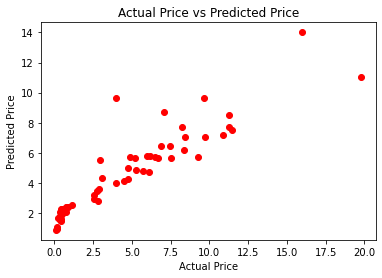

In [50]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()